In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from numpy import linalg as LA

In [13]:
from google.colab import files

Se trabajó inicialmente con una base de datos que predecía el año de lanzamiento de una canción a partir de funciones de audio. Esta base contaba con 90 variables, que luego de estandarizar y aplicar la metodología de Componentes Principales, pasaba de 90 a 29 variables. Por tal razón se procedió a trabajar con otra base de datos.

In [50]:
uploaded=files.upload()

Saving energydata_complete.csv to energydata_complete.csv


Esta base de datos contiene información referente al consumo energético de los electrodomésticos en una vivienda. Los datos de consumo de energía registrados corresponden a información tomada en intervalos de 10 minutos, y esta información fue recogida en 137 días.

In [163]:
data=pd.read_csv("energydata_complete.csv")

In [164]:
data

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,...,17.033333,45.5300,6.600000,733.5,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,...,17.066667,45.5600,6.483333,733.6,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,...,17.000000,45.5000,6.366667,733.7,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.250000,733.8,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.133333,733.9,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,...,23.200000,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
19731,2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,...,23.200000,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
19732,2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,...,23.200000,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
19733,2016-05-27 17:50:00,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,...,23.200000,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784


In [74]:
data.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


De acuerdo a la descripción de la data, observamos que hay un total de 19.735 observaciones y un total de 28 variables. Las variables T1, T2, T3, T4, T5, T6, T7, T8 y T9, representan las temperaturas en el área de la cocina, sala de estar, lavadero, sala oficina, baño, exterior de la construcción, sala de planchado, habitación secundaria y habitación principal, respectivamente. Por su parte, las ***RH***, miden la Humedad Relativa de los espacios en el orden antes señalado. Por no ser necesaria para el proceso de estandarización de eliminó la variable "date". Por otro lado, de acuerdo a la descripción de la base de datos, las variables 'rv1' y 'rv2', corresponden a variables aleatorias introducidas por los investigadores, por lo que también se procedió a eliminar estas variables. La variable 'Appliances' también la eliminaremos debido a que será la que más adelante intentaremos predecir.

In [165]:
data0=data.drop(columns=['date', 'rv1', 'rv2', 'Appliances'])

In [166]:
data0

,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint
0,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,45.566667,17.166667,...,18.2000,48.900000,17.033333,45.5300,6.600000,733.5,92.000000,7.000000,63.000000,5.300000
1,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,45.992500,17.166667,...,18.2000,48.863333,17.066667,45.5600,6.483333,733.6,92.000000,6.666667,59.166667,5.200000
2,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,45.890000,17.166667,...,18.2000,48.730000,17.000000,45.5000,6.366667,733.7,92.000000,6.333333,55.333333,5.100000
3,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,45.723333,17.166667,...,18.1000,48.590000,17.000000,45.4000,6.250000,733.8,92.000000,6.000000,51.500000,5.000000
4,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,45.530000,17.200000,...,18.1000,48.590000,17.000000,45.4000,6.133333,733.9,92.000000,5.666667,47.666667,4.900000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,45.590000,23.200000,...,24.7000,50.074000,23.200000,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333
19731,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,45.590000,23.230000,...,24.7000,49.790000,23.200000,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000
19732,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,45.730000,23.230000,...,24.7000,49.660000,23.200000,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667
19733,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,45.790000,23.200000,...,24.6625,49.518750,23.200000,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333


In [136]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

Posteriormente, procedemos a estandarizar las variables, con el fin de poder aplicar la metodología PCA.

In [167]:
df_st =  StandardScaler().fit_transform(data0)  
pd.DataFrame(df_st, columns=data0.columns).head()

,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint
0,3.301264,-1.118645,1.843821,-0.520411,1.073683,-1.235063,1.686130,-0.908217,1.506438,-1.314903,...,-1.957509,1.141572,-1.217324,0.958136,-0.152647,-2.976328,0.82208,1.207694,2.091596,0.366975
1,3.301264,-1.118645,1.616807,-0.520411,1.057097,-1.235063,1.704566,-0.908217,1.604528,-1.314903,...,-1.957509,1.134554,-1.200778,0.965363,-0.174588,-2.962813,0.82208,1.071703,1.766584,0.343135
2,3.301264,-1.118645,1.517959,-0.520411,1.033550,-1.235063,1.748608,-0.944115,1.580918,-1.314903,...,-1.957509,1.109032,-1.233869,0.950910,-0.196529,-2.949298,0.82208,0.935713,1.441572,0.319294
3,4.561378,-1.118645,1.459321,-0.520411,1.024540,-1.235063,1.769092,-0.962063,1.542526,-1.314903,...,-2.008631,1.082233,-1.233869,0.926821,-0.218470,-2.935783,0.82208,0.799723,1.116559,0.295454
4,4.561378,-1.118645,1.526336,-0.520411,1.009797,-1.235063,1.769092,-0.962063,1.497991,-1.296832,...,-2.008631,1.082233,-1.233869,0.926821,-0.240411,-2.922268,0.82208,0.663733,0.791547,0.271613


Una vez estandarizadas, a continuación procedemos a validar si las primeras 5 componentes recogen la información suficiente para explicar el conjunto original de datos.

In [168]:
pca_out = PCA(n_components=5).fit(df_st)
pca_out.explained_variance_ratio_

array([0.37291678, 0.28251035, 0.07279006, 0.04545092, 0.04176416])

In [169]:
np.cumsum(pca_out.explained_variance_ratio_)

array([0.37291678, 0.65542713, 0.72821719, 0.77366811, 0.81543227])

Al validar las primeras 5 componentes, se observa que las tres primeras de ellas explican la mayor parte de la variación de los datos originales, aproximadamente en un 72.82%.

In [170]:
loadings = pca_out.components_
num_pc = pca_out.n_features_
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_df['variable'] = data0.columns.values
loadings_df = loadings_df.set_index('variable')
loadings_df

,PC1,PC2,PC3,PC4,PC5
variable,,,,,
lights,-0.031239,-0.038684,0.031467,0.745996,0.232739
T1,0.300893,0.009020,-0.095542,0.125473,0.042834
RH_1,0.080887,-0.331781,0.008750,0.014437,0.009559
T2,0.279318,-0.025102,0.188955,0.125749,0.141430
RH_2,0.012223,-0.303146,-0.268449,-0.089644,-0.104973
T3,0.303848,-0.012871,-0.135630,-0.009958,-0.033789
RH_3,-0.010221,-0.348843,0.068110,0.058142,0.066519
T4,0.297670,0.050858,-0.120842,0.095932,0.075484
RH_4,0.041829,-0.358000,0.085717,0.010229,0.060066


In [171]:
loadings_df[(loadings_df["PC1"]>0.28)]["PC1"]

variable
T1    0.300893
T3    0.303848
T4    0.297670
T5    0.299199
T7    0.295028
T9    0.304527
Name: PC1, dtype: float64

In [172]:
loadings_df[(loadings_df["PC2"]<-0.31)]["PC2"]

variable
RH_1   -0.331781
RH_3   -0.348843
RH_4   -0.358000
RH_7   -0.347312
RH_8   -0.345572
RH_9   -0.337168
Name: PC2, dtype: float64

In [173]:
loadings_df[(loadings_df["PC3"]>0.25)]["PC3"]

variable
T6           0.318593
T_out        0.310488
Windspeed    0.496594
Name: PC3, dtype: float64

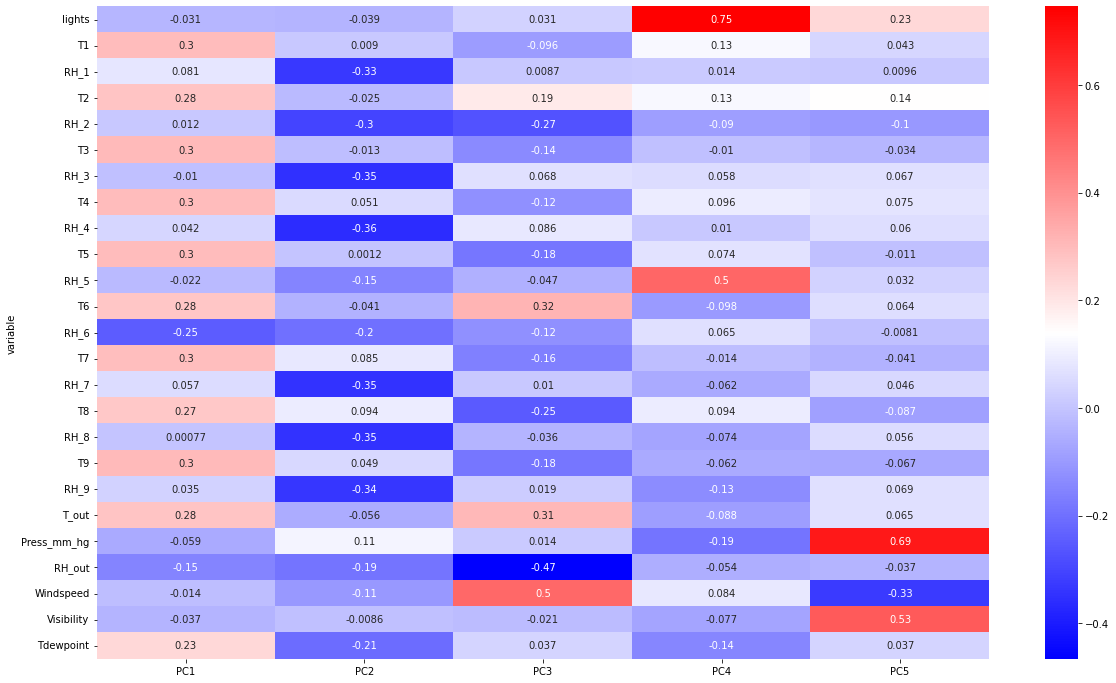

In [174]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,12))
ax = sns.heatmap(loadings_df, annot=True, cmap= 'bwr')
plt.show()

In [146]:
pca_out.explained_variance_ratio_, pca_out.explained_variance_ratio_[:4].sum()

(array([0.37291678, 0.28251035, 0.07279006, 0.04545092, 0.04176416]),
 0.7736681118507778)

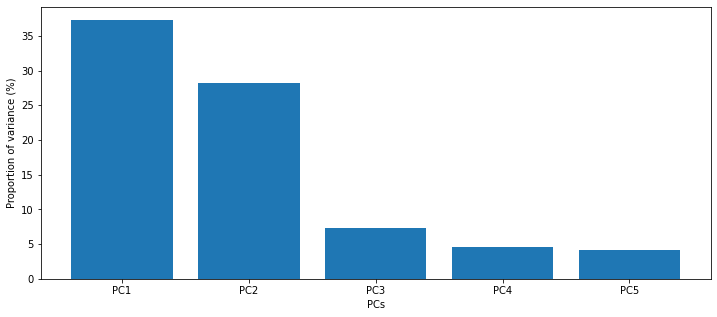

In [147]:
plt.figure(figsize=(12,5))
plt.bar(loadings_df.columns,pca_out.explained_variance_ratio_*100)
plt.ylabel("Proportion of variance (%)")
plt.xlabel("PCs")
plt.show()

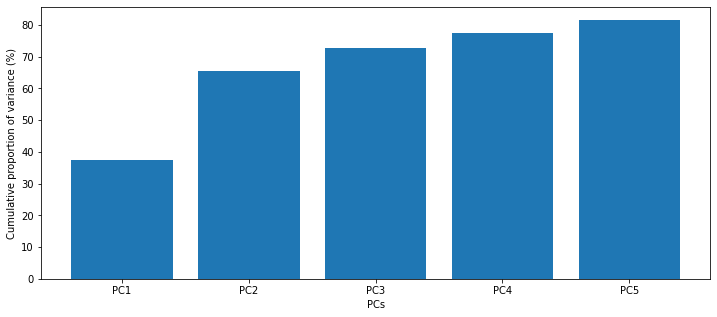

In [148]:
plt.figure(figsize=(12,5))
plt.bar(loadings_df.columns,np.cumsum(pca_out.explained_variance_ratio_*100))
plt.ylabel("Cumulative proportion of variance (%)")
plt.xlabel("PCs")
plt.show()

In [149]:
! pip install bioinfokit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


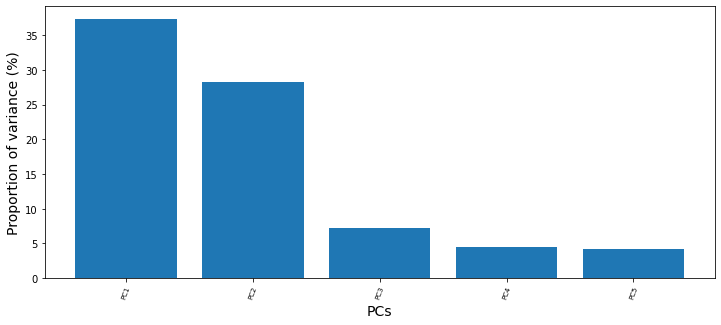

In [150]:
pca_out.explained_variance_

from bioinfokit.visuz import cluster
cluster.screeplot(obj=[loadings_df.columns,pca_out.explained_variance_ratio_],show=True,dim=(12,5),axlabelfontsize=14,)
plt.show()

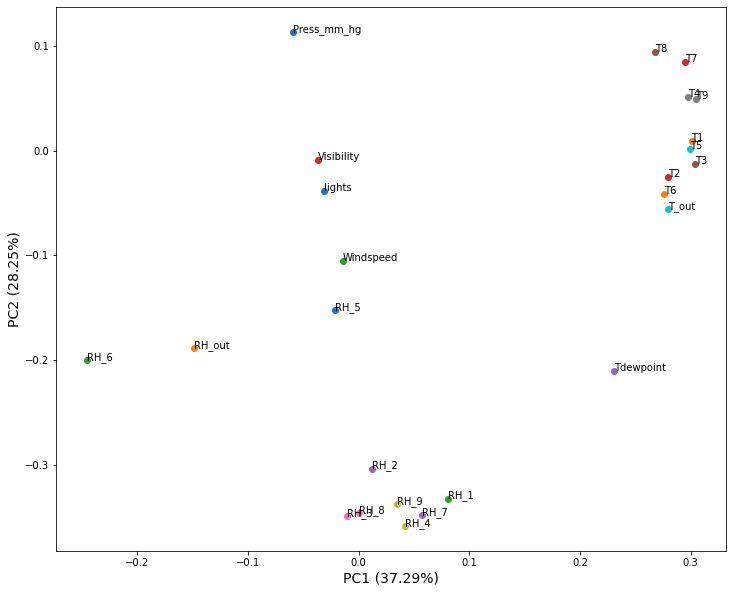

In [151]:
cluster.pcaplot(x=loadings[0], y=loadings[1], labels=data0.columns.values,
                show=True,dim=(12,10),axlabelfontsize=14,
    var1=round(pca_out.explained_variance_ratio_[0]*100, 2),
    var2=round(pca_out.explained_variance_ratio_[1]*100, 2))

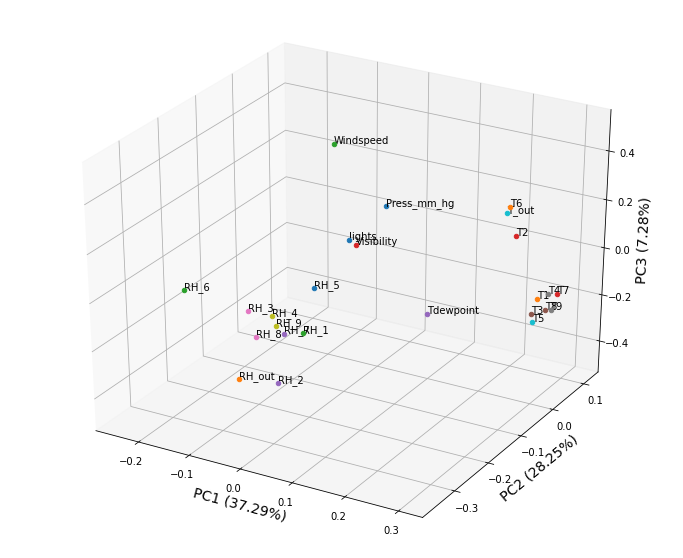

In [152]:
cluster.pcaplot(x=loadings[0], y=loadings[1], z=loadings[2],  labels=data0.columns.values, 
                show=True,dim=(12,10),axlabelfontsize=14,
                var1=round(pca_out.explained_variance_ratio_[0]*100, 2), 
                var2=round(pca_out.explained_variance_ratio_[1]*100, 2), 
                var3=round(pca_out.explained_variance_ratio_[2]*100, 2))

In [155]:
cmap=plt.cm.Blues
norm=plt.Normalize(vmin=10,vmax=1080)

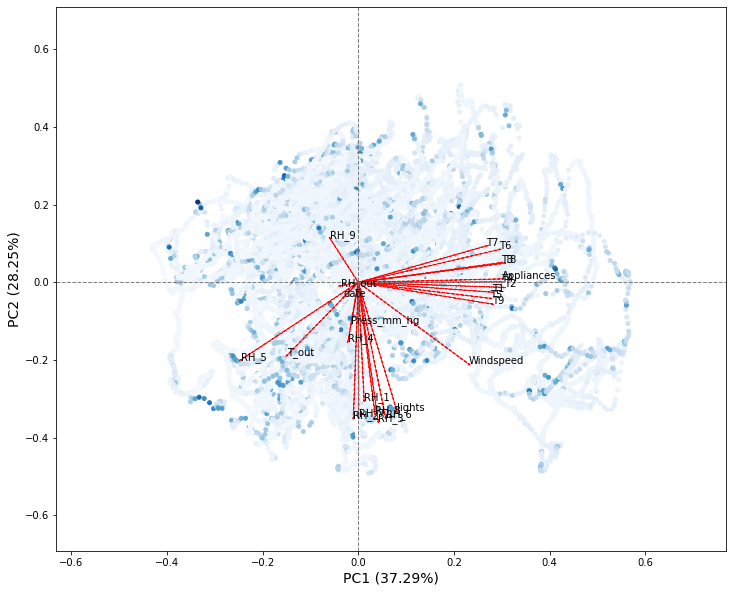

In [157]:
pca_scores = PCA().fit_transform(df_st)

# get 2D biplot
cluster.biplot(cscore=pca_scores, loadings=loadings, labels=data.columns.values,dotsize=16,
               colordot= cmap(norm(data['Appliances'])),arrowcolor='r',arrowlinewidth=0.9,arrowlinestyle='--',show=True,dim=(12,10),axlabelfontsize=14,
               var1=round(pca_out.explained_variance_ratio_[0]*100, 2),
               var2=round(pca_out.explained_variance_ratio_[1]*100, 2))

In [154]:
data['Appliances'].min(), data['Appliances'].max()

(10, 1080)

In [132]:
import statsmodels.api as sm

In [190]:

#X = data[["T1", "T3", "T4", "T5", "T6", "T7","T9", "RH_1", "RH_3","RH_4", "RH_5", "RH_6", "RH_7","RH_9", "Windspeed" ]]
X=data[["T1","RH_1","T3","RH_3","T4","RH_4","T5","T7","RH_7","RH_8","T9","RH_9","T_out","Windspeed"]]
Y = data["Appliances"]
X= sm.add_constant(X)
model = sm.OLS(Y,X).fit()
pred=round(model.predict(X))
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Appliances   R-squared:                       0.116
Model:                            OLS   Adj. R-squared:                  0.116
Method:                 Least Squares   F-statistic:                     185.3
Date:                Sat, 04 Jun 2022   Prob (F-statistic):               0.00
Time:                        20:50:35   Log-Likelihood:            -1.1816e+05
No. Observations:               19735   AIC:                         2.363e+05
Df Residuals:                   19720   BIC:                         2.365e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         31.6660     17.848      1.774      0.076      -3.318      66.650
T1            -4.2653      1.302     -3.276      0.001      -6.817      -1.713
RH_1           7.4402      0.466     15.954      0.000       6.526       8.354
T3            23.3592      1.042     22.410      0.000      21.316      25.402
RH_3           4.3913      0.646      6.796      0.000       3.125       5.658
T4             1.9379      0.953      2.034      0.042       0.071       3.805
RH_4           0.2951      0.602      0.490      0.624      -0.886       1.476
T5            -2.4579      1.135     -2.165      0.030      -4.683      -0.232
T7             5.3534      1.186      4.514      0.000       3.029       7.678
RH_7          -3.6189      0.394     -9.197      0.000      -4.390      -2.848
RH_8          -5.0276      0.355    -14.166      0.000      -5.723      -4.332
T9           -26.4437      1.530    -17.288      0.000     -29.442     -23.446
RH_9          -2.5966      0.404     -6.428      0.000      -3.388      -1.805
T_out          1.6046      0.225      7.117      0.000       1.163       2.047
Windspeed      2.3385      0.323      7.229      0.000       1.704       2.973
==============================================================================
Omnibus:                    14126.305   Durbin-Watson:                   0.577
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           213429.390
Skew:                           3.380   Prob(JB):                         0.00
Kurtosis:                      17.624   Cond. No.                     2.88e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.88e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [191]:
X=data[["T1","RH_1","T3","RH_3","T4","RH_4","T5","T7","RH_7","RH_8","T9","RH_9","T_out","Windspeed"]]
Y = data["Appliances"]
#X= sm.add_constant(X)
model = sm.OLS(Y,X).fit()
pred=round(model.predict(X))
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             Appliances   R-squared (uncentered):                   0.537
Model:                            OLS   Adj. R-squared (uncentered):              0.536
Method:                 Least Squares   F-statistic:                              1632.
Date:                Sat, 04 Jun 2022   Prob (F-statistic):                        0.00
Time:                        20:54:55   Log-Likelihood:                     -1.1816e+05
No. Observations:               19735   AIC:                                  2.363e+05
Df Residuals:                   19721   BIC:                                  2.365e+05
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
T1            -3.6593      1.257     -2.912      0.004      -6.122      -1.196
RH_1           7.3788      0.465     15.865      0.000       6.467       8.290
T3            23.2345      1.040     22.340      0.000      21.196      25.273
RH_3           4.8430      0.594      8.154      0.000       3.679       6.007
T4             2.0106      0.952      2.112      0.035       0.145       3.876
RH_4           0.3428      0.602      0.570      0.569      -0.837       1.522
T5            -2.7671      1.122     -2.466      0.014      -4.966      -0.568
T7             5.5977      1.178      4.752      0.000       3.289       7.907
RH_7          -3.8083      0.379    -10.054      0.000      -4.551      -3.066
RH_8          -4.9710      0.353    -14.063      0.000      -5.664      -4.278
T9           -26.0096      1.510    -17.225      0.000     -28.969     -23.050
RH_9          -2.5838      0.404     -6.397      0.000      -3.376      -1.792
T_out          1.4118      0.198      7.146      0.000       1.025       1.799
Windspeed      2.4470      0.318      7.703      0.000       1.824       3.070
==============================================================================
Omnibus:                    14133.054   Durbin-Watson:                   0.577
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           213788.311
Skew:                           3.381   Prob(JB):                         0.00
Kurtosis:                      17.637   Cond. No.                         305.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

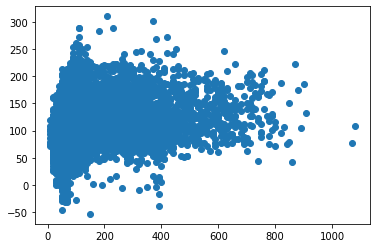

In [176]:
plt.scatter(Y,pred)